In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.shape

(91335, 39)

#**📌 Q1. 전국 시도별 약국수를 구해주세요!**

* 상권업종소분류명이 약국인 것을 찾아 빈도수를 구해주세요.이 때, value_counts, groupby, pivot_table 등 다양한 집계 방법을 통해 구해볼 수 있습니다. 각자 구하기 편한 방법을 통해 빈도수를 구합니다.
*다음의 결과가 나오도록 구합니다.

🔽 출력 예시



```
경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
```



In [ ]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

##value_counts를 이용한 집계

In [ ]:
#상권업종소분류명이 약국인 것만 추출
df1=df[df['상권업종소분류명']=='약국']
#시도명 value counts
df1['시도명'].value_counts()

경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
Name: 시도명, dtype: int64

##group_by를 이용한 집계

In [ ]:
df1.groupby('시도명').size()

시도명
강원도         729
경기도        4510
경상남도       1017
경상북도        915
광주광역시       691
대구광역시       870
대전광역시       603
부산광역시      1130
서울특별시      3579
세종특별자치시      99
울산광역시       362
인천광역시      1002
전라남도        811
전라북도        862
제주특별자치도     226
충청남도        830
충청북도        648
dtype: int64

#**📌 Q2. 여러분은 반려동물과 관련된 사업을 하는 스타트업에 취업을 하여 상권분석을 해달라는 요청을 받았습니다. 병원이나 약국은 인구나 유동인구가 많은 지역에 주로 위치하고 있습니다. 그렇다면 동물병원도 병원이나 약국이 많은 곳에 더 많이 있을까요?**

* 빈도수를 구하고 시각화 하여 동물병원이 어느 지역에 많은지 분석해 주세요!
*다음의 결과가 나오도록 구합니다.



🔽 출력 예시
```
경기도        992
서울특별시      557
인천광역시      193
경상북도       165
경상남도       161
부산광역시      153
충청남도       131
대구광역시      119
전라북도       111
강원도         85
대전광역시       77
전라남도        77
충청북도        75
광주광역시       71
울산광역시       61
제주특별자치도     46
세종특별자치시     13
Name: 시도명, dtype: int64
```




##**빈도수 구하기**

In [ ]:
df2=df[df['상권업종소분류명']=='동물병원']

In [ ]:
df2['시도명'].value_counts()

경기도        992
서울특별시      557
인천광역시      193
경상북도       165
경상남도       161
부산광역시      153
충청남도       131
대구광역시      119
전라북도       111
강원도         85
대전광역시       77
전라남도        77
충청북도        75
광주광역시       71
울산광역시       61
제주특별자치도     46
세종특별자치시     13
Name: 시도명, dtype: int64

In [ ]:
df2.groupby('시도명').size()

시도명
강원도         85
경기도        992
경상남도       161
경상북도       165
광주광역시       71
대구광역시      119
대전광역시       77
부산광역시      153
서울특별시      557
세종특별자치시     13
울산광역시       61
인천광역시      193
전라남도        77
전라북도       111
제주특별자치도     46
충청남도       131
충청북도        75
dtype: int64

##**시각화**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')

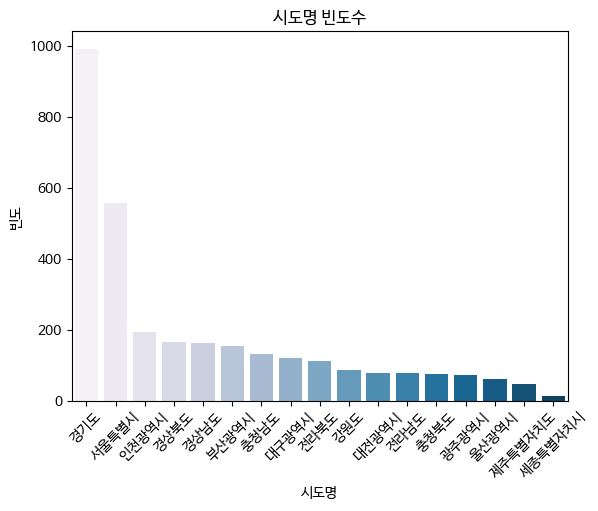

In [ ]:
value_counts = df2['시도명'].value_counts()

# 시각화
sns.barplot(x=value_counts.index, y=value_counts.values, palette="PuBu")
plt.title('시도명 빈도수')
plt.xlabel('시도명')
plt.ylabel('빈도')
plt.xticks(rotation=45)
plt.show()

#**📌Q3. 강남지역에는 다른 지역에 비해 피부과나 성형외과가 많아 보입니다. 실제로 해당 지역에 피부과나 성형외과가 다른 지역에 비해 전체 병원 수 중에서 어느 정도의 비율을 차지하고 있는지 알아보겠습니다.**

* 서울에 소재한 병원 중 상권업종소분류명에 "피부" 나 "성형"이 들어간 분류명을
찾아 구해주세요!
* 피부과 성형외과 수 / 전체병원 수 로 비율을 구해주세요!
* 비율이 높은 순서대로 정렬되게 구해주세요!
* 수업에서 사용한 같은 CSV 파일을 사용하며 다음의 결과가 나오도록 구합니다.
* 소숫점 두 번째짜리까지 출력하는 방법은 pandas round 로 검색해서 사용법을 알아보세요!

🔽 출력 예시


```
시군구명
강남구     0.24
서초구     0.17
마포구     0.09
영등포구    0.08
서대문구    0.08
강서구     0.07
강동구     0.07
중구      0.07
양천구     0.07
중랑구     0.07
성북구     0.06
송파구     0.06
구로구     0.06
은평구     0.06
광진구     0.06
노원구     0.05
성동구     0.05
금천구     0.05
용산구     0.05
강북구     0.05
동대문구    0.04
동작구     0.04
관악구     0.04
종로구     0.03
도봉구     0.02
```



##**분류명 추출**

In [ ]:
# 서울에 소재하는 병원 추출
seoul_hospitals = df[(df['시도명'] == '서울특별시') & (df['상권업종중분류명'] == '병원')]

# 피부과와 성형외과 병원 추출
derma_plastic_hospitals = seoul_hospitals[(seoul_hospitals['상권업종소분류명'] == '피부과') | (seoul_hospitals['상권업종소분류명'] == '정형/성형외과')]


##**비율 계산**

In [ ]:
# 서울의 전체 병원 수
total_hospitals = len(seoul_hospitals)

# 피부과와 성형외과 병원 수
derma_plastic_hospitals_count = len(derma_plastic_hospitals)

# 비율 계산
ratio = (derma_plastic_hospitals_count / total_hospitals) * 100  # 비율을 백분율로 계산

# 결과 출력
result = derma_plastic_hospitals['시군구명'].value_counts(normalize=True).round(2).sort_values(ascending=False)
print(result)

강남구     0.44
서초구     0.15
송파구     0.03
마포구     0.03
영등포구    0.03
강서구     0.03
광진구     0.03
강동구     0.03
중랑구     0.02
노원구     0.02
양천구     0.02
동대문구    0.02
성북구     0.02
서대문구    0.02
은평구     0.02
중구      0.02
성동구     0.01
구로구     0.01
관악구     0.01
동작구     0.01
강북구     0.01
종로구     0.01
용산구     0.01
금천구     0.01
도봉구     0.00
Name: 시군구명, dtype: float64


In [ ]:
df['상권업종중분류명'].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [ ]:
df['상권업종소분류명'].value_counts()

약국         18964
치과의원       13731
한의원        13211
내과/외과      11374
기타병원        4922
일반병원        3385
동물병원        3098
정형/성형외과     2562
소아과         2472
수의업-종합      2216
치과기공소       1724
이비인후과의원     1486
한약방         1442
피부과         1273
산부인과        1116
노인/치매병원     1055
안과의원        1042
비뇨기과         809
종합병원         762
치과병원         756
언어치료         664
유사의료업기타      629
탕제원          517
산후조리원        511
신경외과         421
한방병원         397
척추교정치료       338
침구원          154
혈액원          130
응급구조대        125
조산원           30
접골원            9
수의업-기타         9
제대혈            1
Name: 상권업종소분류명, dtype: int64

#**📌Q4. 평균 기대수명이 점점 길어지면서 실버 의료 산업도 주목받고 있습니다. 여러분은 실버 의료 산업과 관련된 스타트업에 취업했습니다. 지도를 시각화하여 '노인/치매병원'이 주로 어디에 위치하고 있는지를 찾아보고자 합니다.**

* folium 을 통해 지도에 전국의 '노인/치매병원'을 표시해 주세요!
* 다음과 같이 시각화 하며, folium 의 문서를 참고하여 다른 기능을 사용하여 좀 더 멋지게 지도를 꾸며도 좋습니다.
* folium 문서 : https://python-visualization.github.io/folium/quickstart.html

🔽 출력 예시


```
시군구명
강남구     0.24
서초구     0.17
마포구     0.09
영등포구    0.08
서대문구    0.08
강서구     0.07
강동구     0.07
중구      0.07
양천구     0.07
중랑구     0.07
성북구     0.06
송파구     0.06
구로구     0.06
은평구     0.06
광진구     0.06
노원구     0.05
성동구     0.05
금천구     0.05
용산구     0.05
강북구     0.05
동대문구    0.04
동작구     0.04
관악구     0.04
종로구     0.03
도봉구     0.02
```



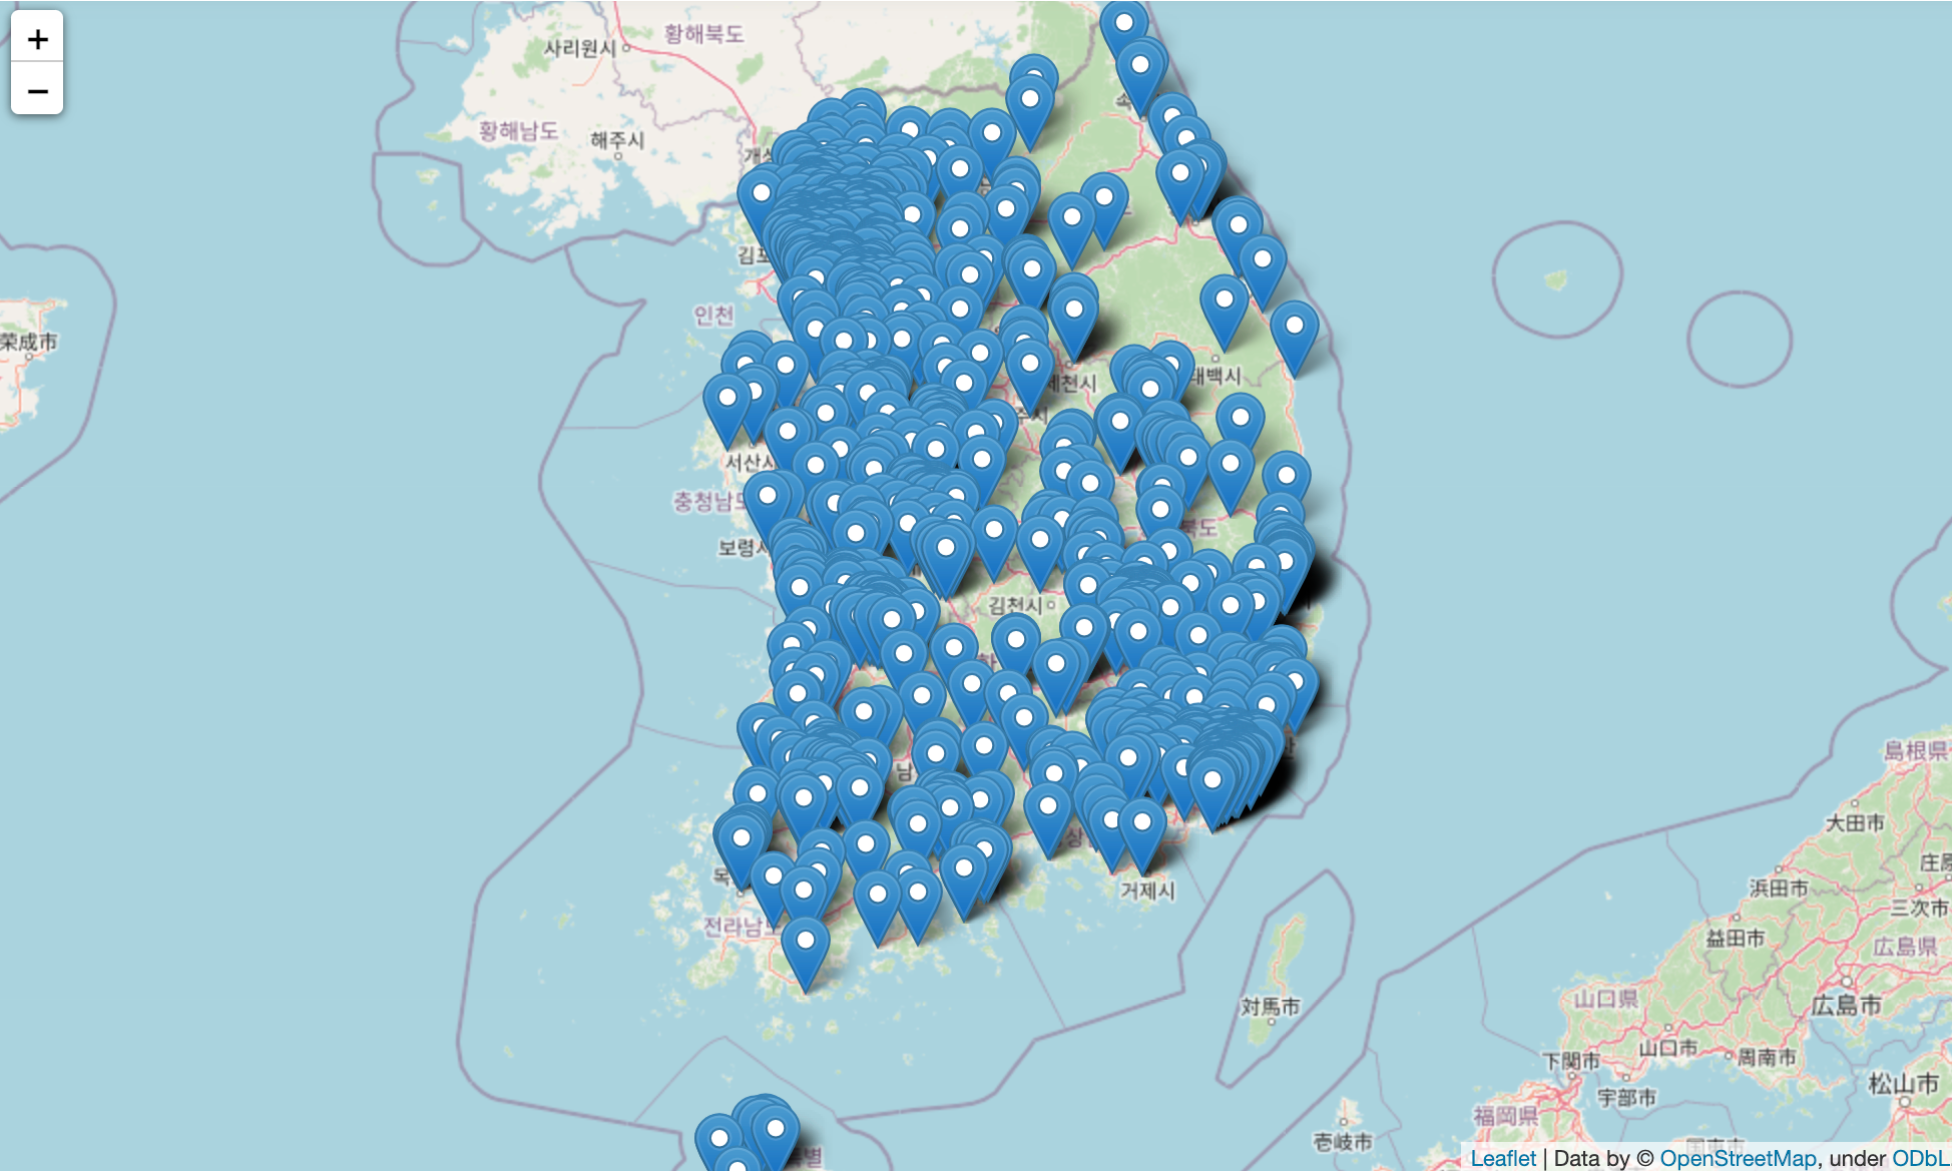

In [ ]:
import folium

In [ ]:
senior_dementia_hospitals = df[df['상권업종소분류명'] == '노인/치매병원']

In [ ]:
m = folium.Map(location=[36.5, 127.5], zoom_start=7)


for index, row in senior_dementia_hospitals.iterrows():
    folium.Marker([row['위도'], row['경도']], tooltip=row['상호명']).add_to(m)


In [ ]:
m